In [1]:
from SHDataset import SHDataset
import numpy as np
from utils import *

In [2]:
dataset = SHDataset()
G1,T1,G2,T2 = dataset.read_snapshot(0)

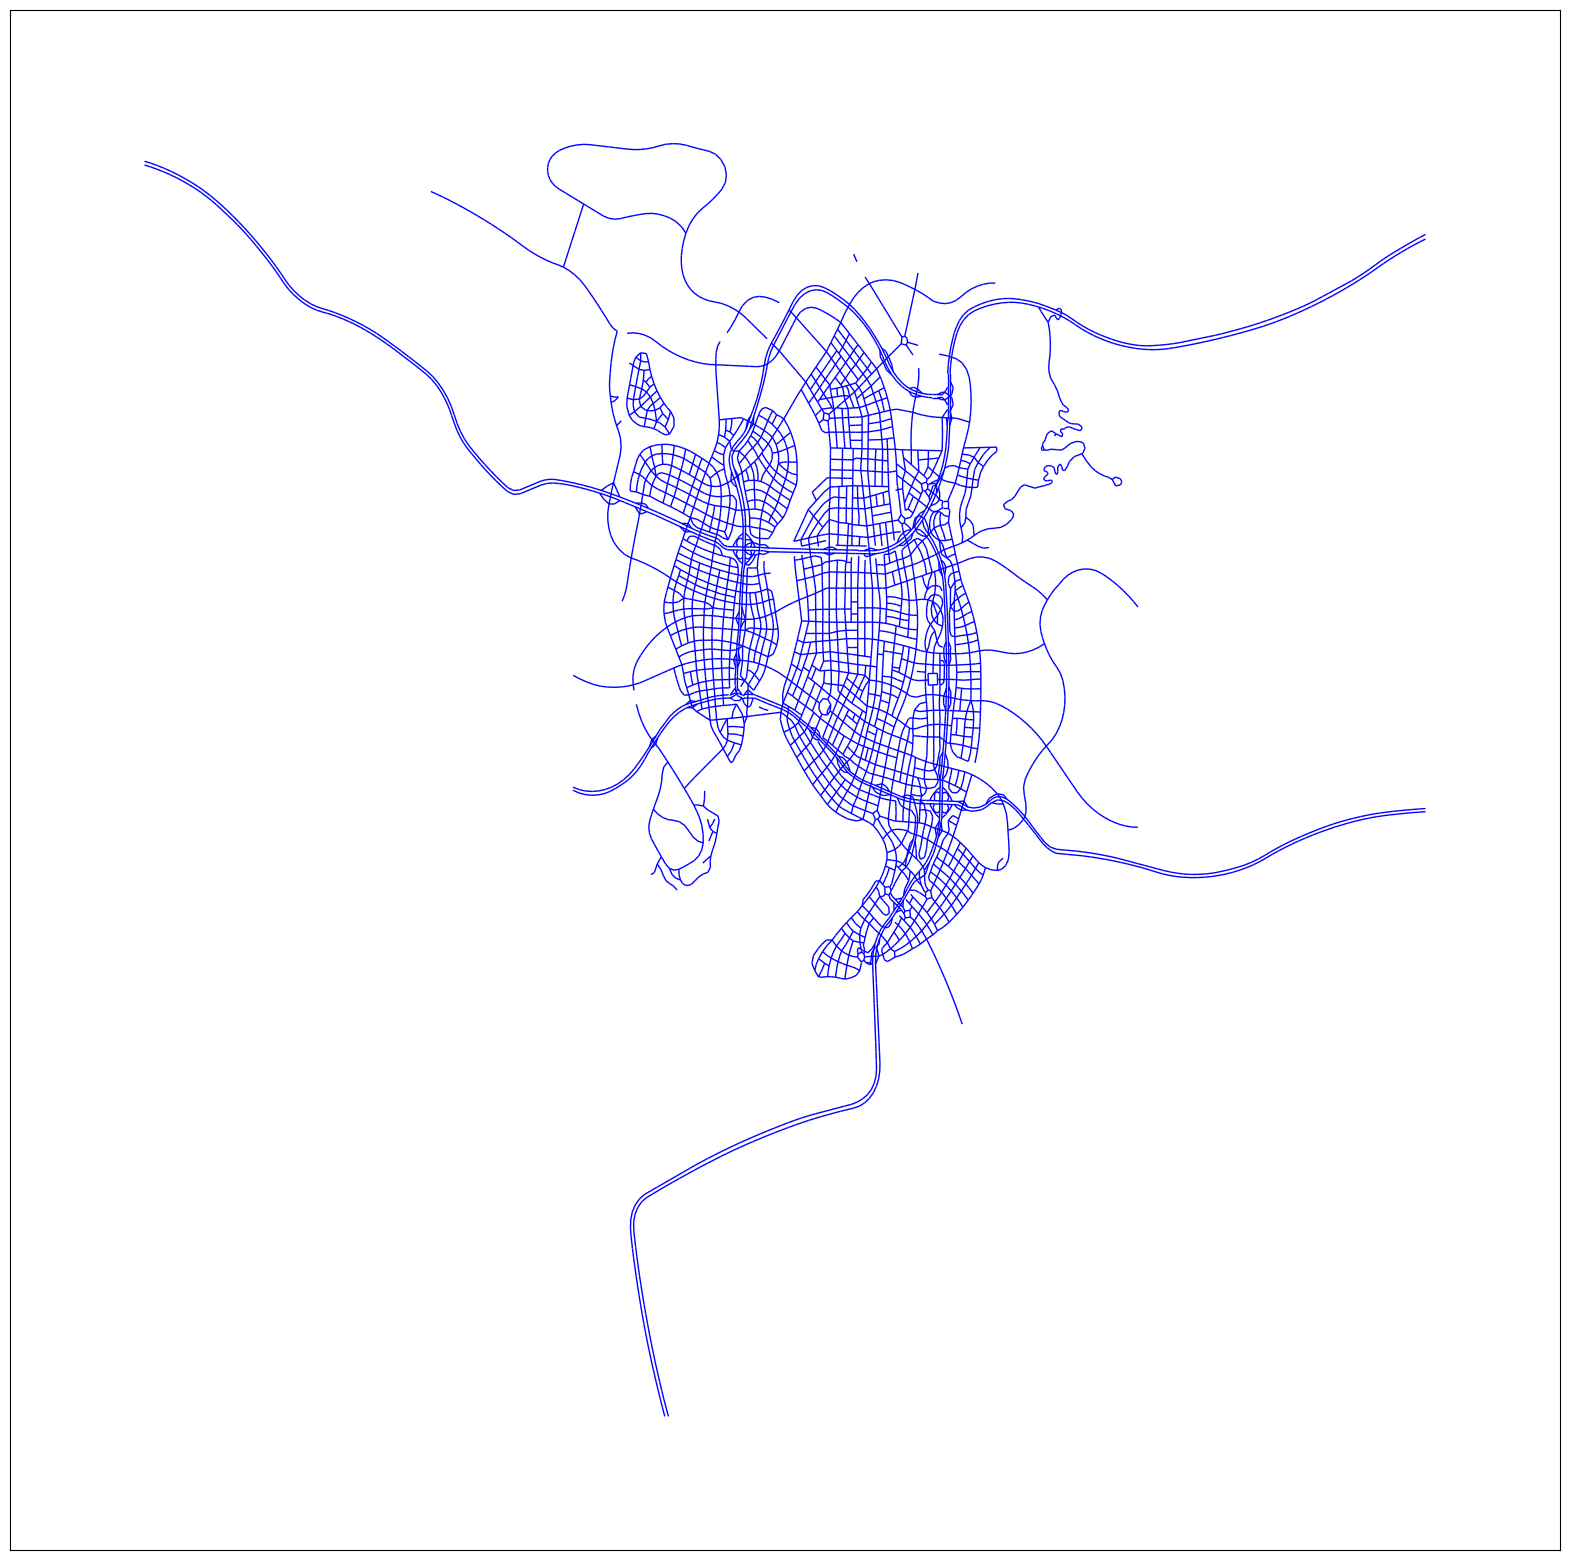

In [3]:
plot_graph(G1, figsize=(20,20))

(67, 2)


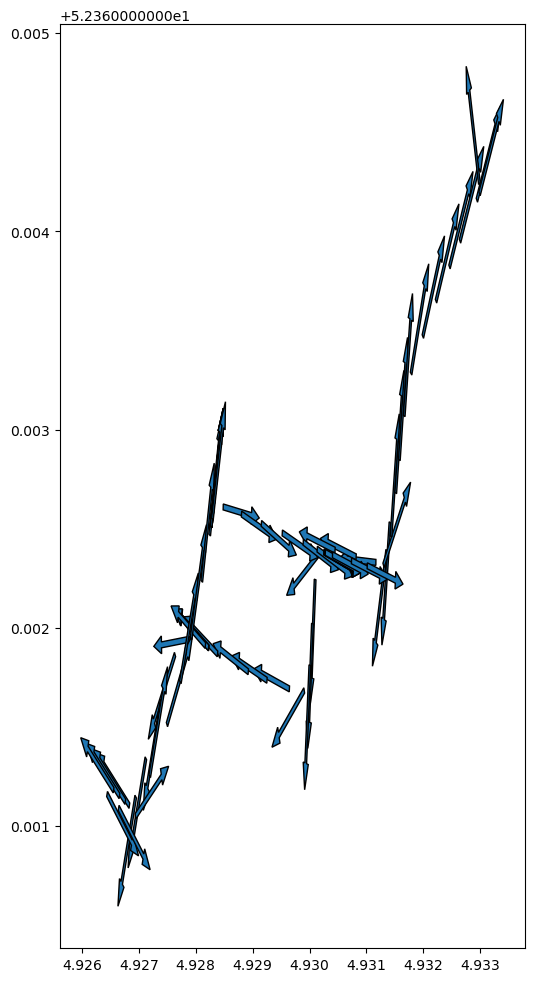

In [6]:
import matplotlib.pyplot as plt

def plot_single_t(t):
    origins = np.array([(p['lat'], p['lon']) for p in t])
    V = np.array([(p['z'], p['x']) for p in t])
    plt.quiver(origins[:,1], origins[:,0], V[:,1], V[:,0])
    plt.show()
    
def plot_T(T):
    origins = np.array([(p['lat'], p['lon']) for t in T for p in t])
    V = np.array([(p['x'], p['z']) for t in T for p in t])
    plt.figure(figsize=(40,40))
    plt.quiver(origins[:,1], origins[:,0], V[:,0], V[:,1])
    plt.show()
    
    
def cal_heading(x, y):
    v = np.array([x,y])
    north = np.array([1.0,0])
    uv = normalize(v)
    heading = np.degrees(np.arccos(np.clip(np.dot(north, uv), -1.0, 1.0)))
    heading = np.nan_to_num(heading, nan=0.0)
    return heading
    
def plot_arrows(t):
    origins = np.array([(p['lat'], p['lon']) for p in t])
    headings = np.array([p['heading'] for p in t])
    print(origins.shape)
    
    plt.figure(figsize=(6,12))
    for i in range(len(origins)):
        r=0.0005
        
        dx = r*np.sin(np.deg2rad(headings[i]))
        dy = r*np.cos(np.deg2rad(headings[i]))
#         print(f'x: {origins[i,1]} y: {origins[i,0]}, dx: {dx}, dy: {dy}, heading: {headings[i]}')
        plt.arrow(origins[i,1], origins[i,0], dx, dy, width=0.00003)
        
    plt.show()
    
    
    
# plot_single_t(T1[2])
plot_arrows(T2[100])
# plot_T(T)

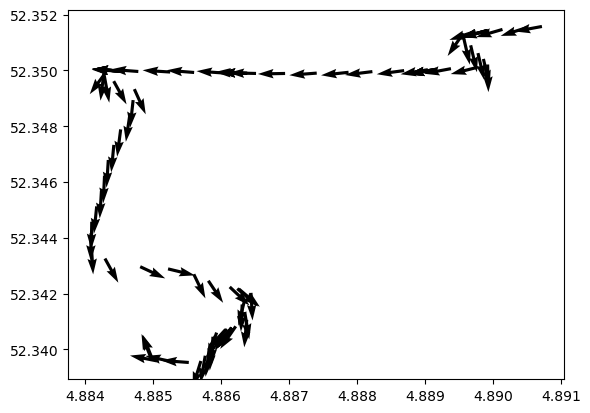

In [5]:
plot_single_t(T1[4])

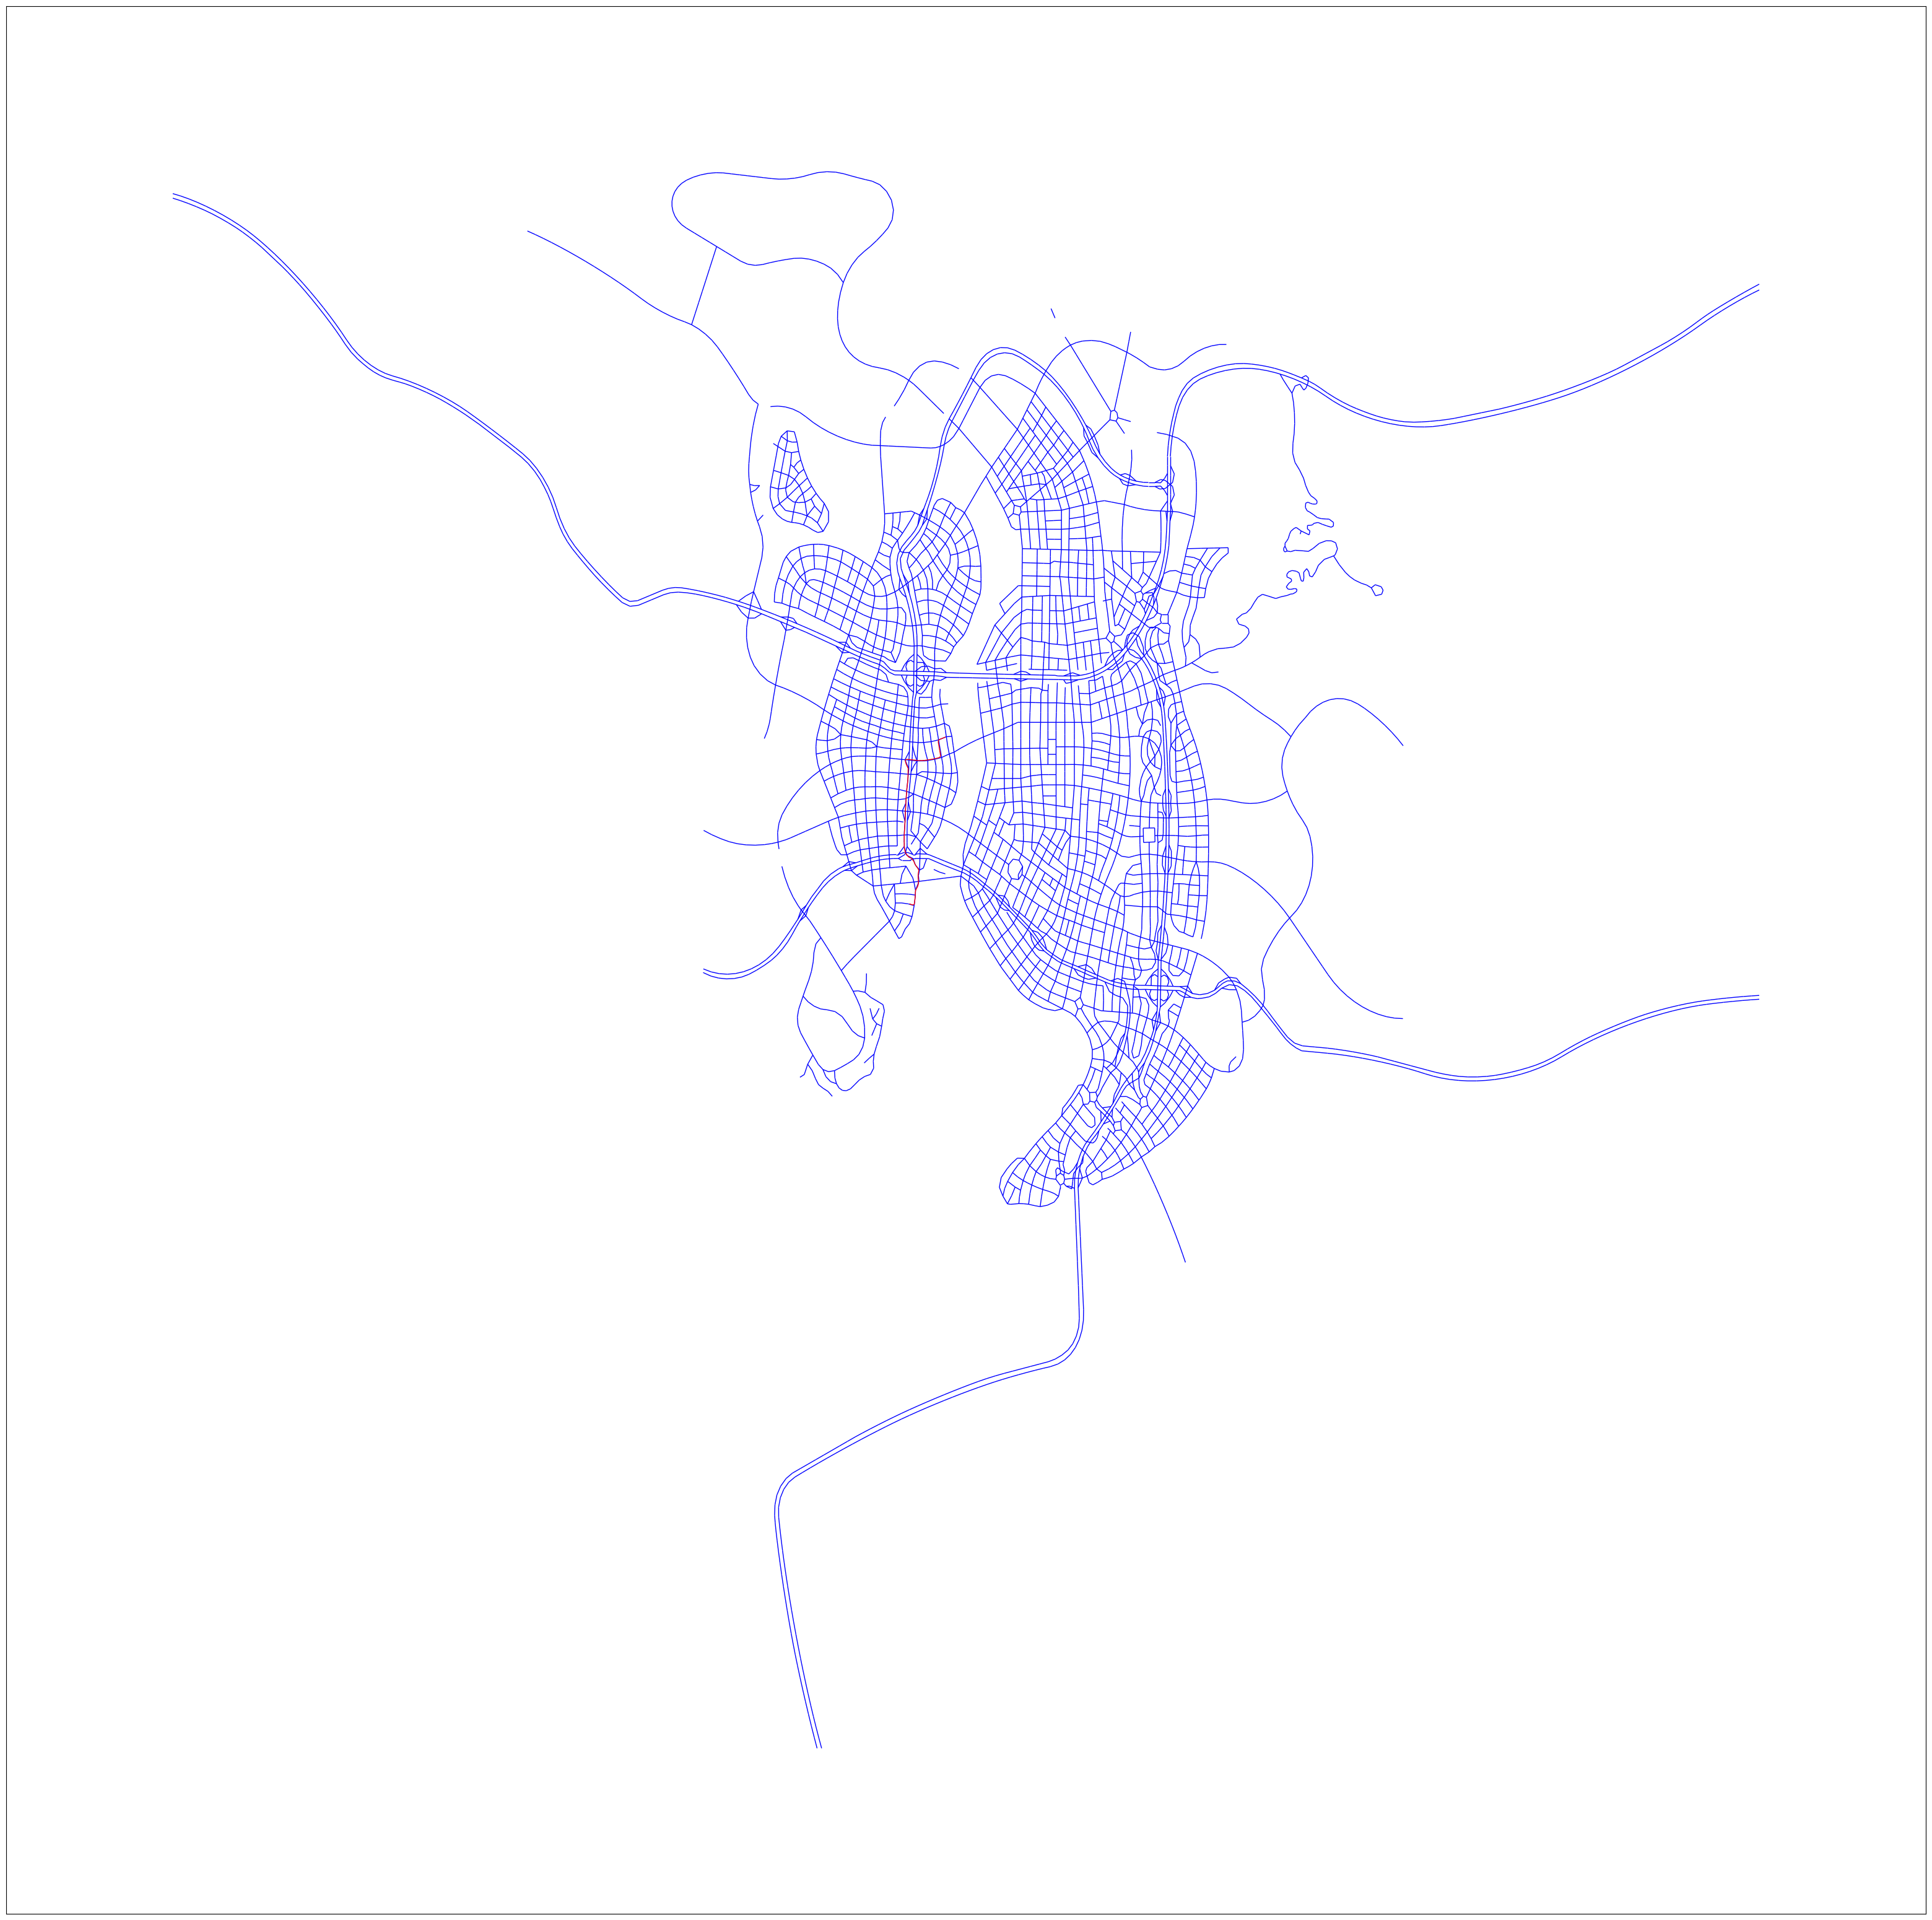

In [10]:
plot_graph(combine_graphs(G1, traj_to_nxgraph(T1[99:100])), figsize=(40,40))

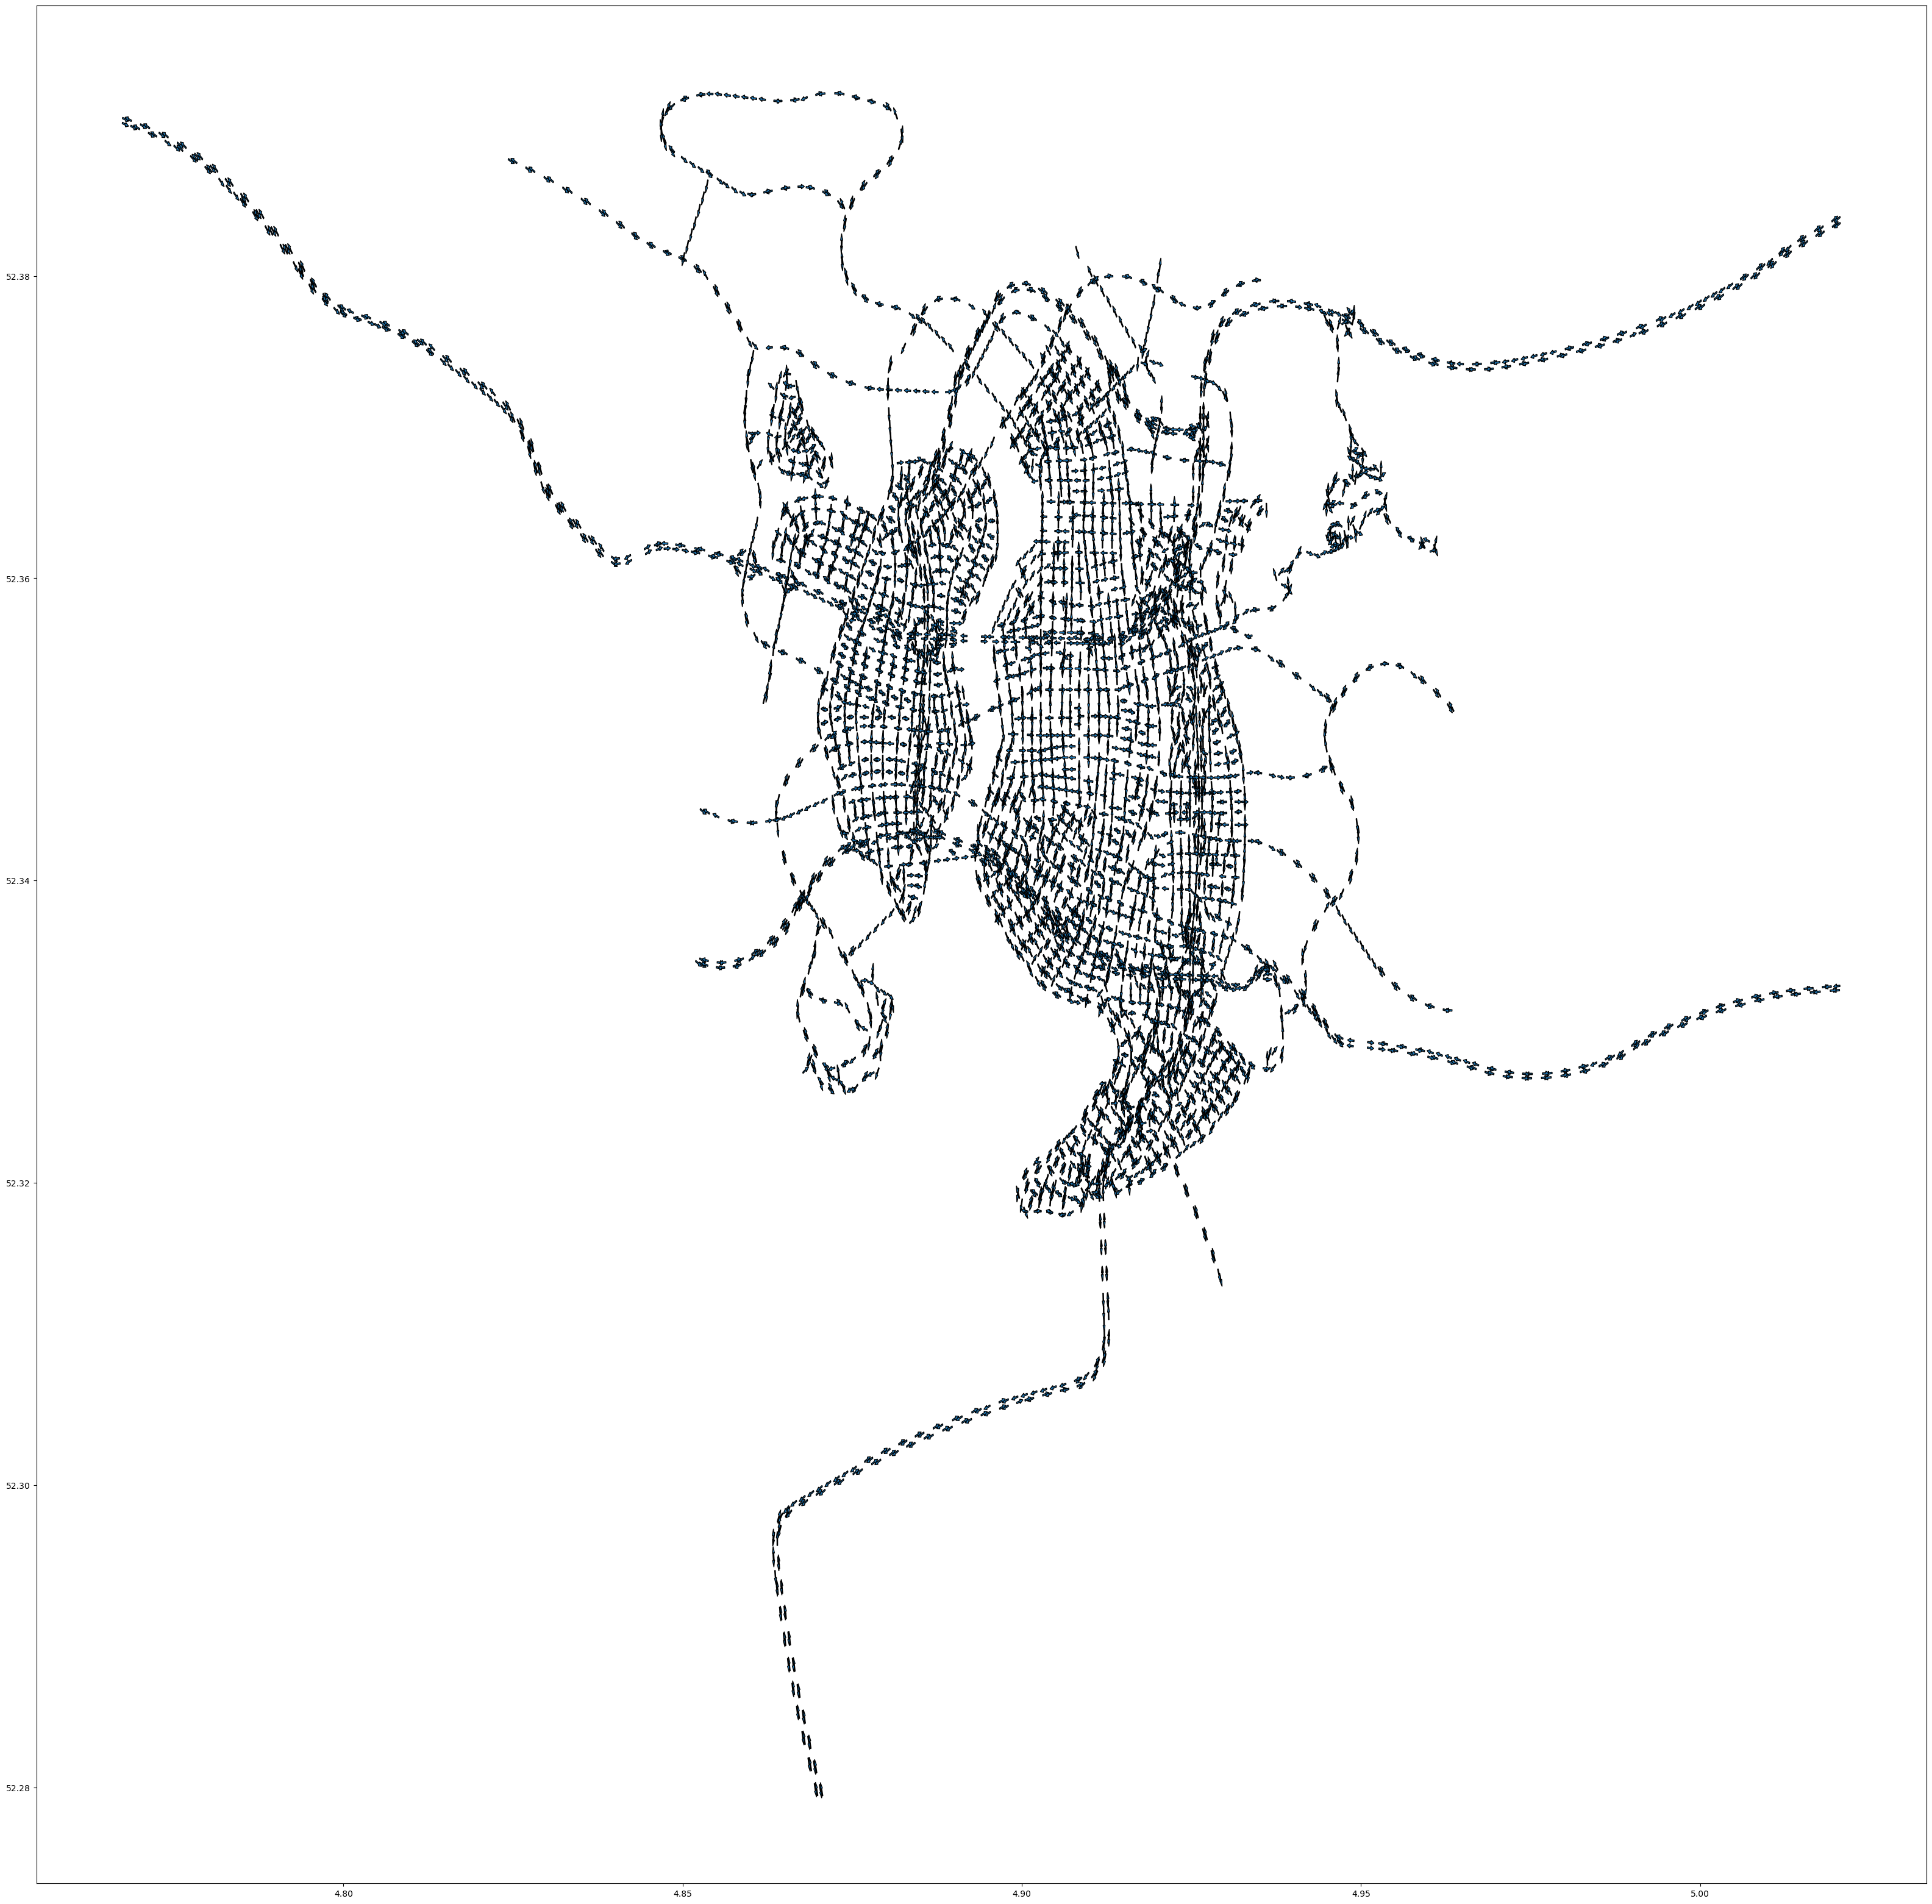

In [7]:
dataset = SHDataset()
G1 = dataset.parse_map('./dataset/raw_data/Lorentum_1_map.xml')

def plot_edgeheadings(G):
    
    node_coords = np.array([(node[1]['lat'], node[1]['lon']) for node in G.nodes(data=True)])
    
    edge_coords = np.array([(edge[2]['middle_coordinate']['lat'], edge[2]['middle_coordinate']['lon']) for edge in G.edges(data=True)])
    headings = np.array([edge[2]['fwd_azimuth'] for edge in G.edges(data=True)])
    headings = np.where(headings < 0, 360 + headings, headings)
    
    plt.figure(figsize=(40,40))
    for i in range(len(edge_coords)):
        r=0.0005
        
        dx = r*np.sin(np.deg2rad(headings[i]))
        dy = r*np.cos(np.deg2rad(headings[i]))
#         print(f'x: {origins[i,1]} y: {origins[i,0]}, dx: {dx}, dy: {dy}, heading: {headings[i]}')
        plt.arrow(edge_coords[i,1], edge_coords[i,0], dx, dy, width=0.0001)
    
    plt.show()
    
plot_edgeheadings(G1)